# **Road Sign Image Classification**

This project aims to build a multi-class image classification system capable of identifying different types of road traffic signs from images. Road sign recognition is an important component of driver assistance systems and autonomous vehicles. The types are following:
* Airport ahead sign
* Fuel station sign
* Hospital zone sign
* No entry sign
* No horn sign
* No overtaking sign
* No parking sign
* Railway crossing sign
* Roundabaout sign
* Speed limit sign

In [ ]:
%matplotlib inline
bs = 32 # batch size

In [ ]:
!pip install -Uqq fastai

# Importing Necessary Libraries

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

# Mounting Drive and Setting Up Project Directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/mastercourse/road_sign_classification

/content/drive/MyDrive/mastercourse/road_sign_classification


# Loading from Dataloaders

In [ ]:
data_path = "data"
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(224))

In [ ]:
batch_tfms = aug_transforms(
    size=224,
    max_rotate=5,      # small rotations only
    max_zoom=1.1,
    max_lighting=0.2,
    flip_vert=False,   # never flip vertically
    p_affine=0.7

)


In [ ]:
dblock = dblock.new(item_tfms=Resize(224, ResizeMethod.Pad))
dls = dblock.dataloaders(data_path, bs = bs)

In [ ]:
from collections import Counter
from pathlib import Path

labels = [p.parent.name for p in dls.train_ds.items]
Counter(labels)


Counter({'no_horn_sign': 157,
         'fuel_station_sign': 165,
         'railway_crossing_sign': 164,
         'no_parking_sign': 159,
         'airport_ahead_sign': 165,
         'no_entry_sign': 162,
         'no_overtaking_sign': 165,
         'speed_limit_sign': 165,
         'roundabout_ahead_sign': 158,
         'hospital_zone_sign': 160})

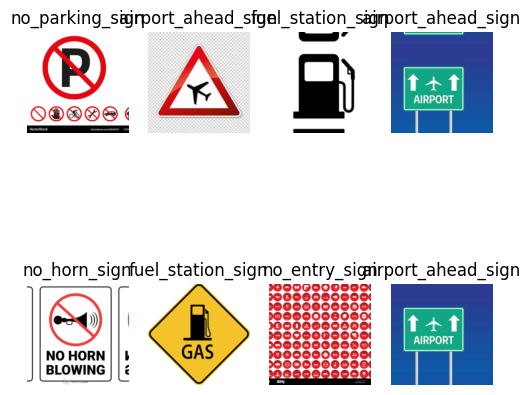

In [ ]:
dls.train.show_batch(max_n=8, figsize=(6,6))

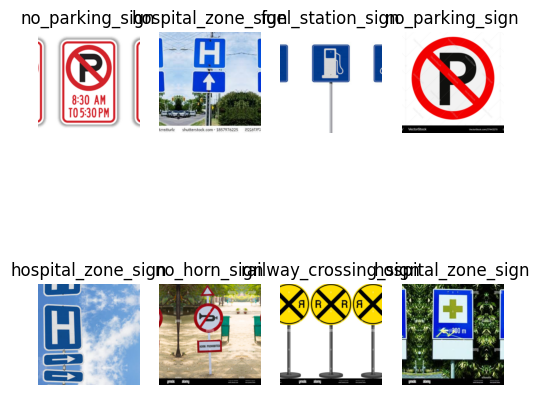

In [ ]:
dls.valid.show_batch(max_n=8, figsize=(6,6))

# Training and Data Cleaning

# ResNet34

In [ ]:
learn_r34 = vision_learner(dls, resnet34, metrics=accuracy)


In [ ]:
learn_r34.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.150300,0.362135,0.893855,00:37


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,0.138015,0.530154,0.893855,00:37
1,0.371905,0.715376,0.871508,00:38
2,0.254213,0.540319,0.910615,00:36
3,0.114161,0.482900,0.905028,00:37
4,0.073279,0.473898,0.910615,00:38


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in by

In [ ]:
results =[]

In [ ]:
results.append(["ResNet-34", round(learn_r34.validate()[1], 2)])

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
import os
os.makedirs("models", exist_ok=True)

learn_r34.export("models/road_sign_classifier_resnet_r34_best.pkl")


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


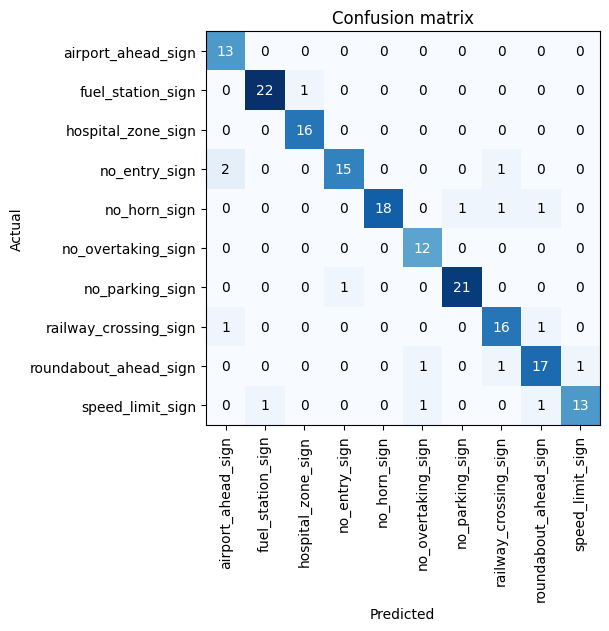

In [ ]:
interp_r34 = ClassificationInterpretation.from_learner(learn_r34)
interp_r34.plot_confusion_matrix(figsize=(6, 8))

# ResNet50

In [ ]:
learn_r50 = vision_learner(dls, resnet50, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 159MB/s]


In [ ]:
learn_r50.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.799961,0.975922,0.715084,00:40


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,0.881847,0.627724,0.826816,00:41
1,0.701379,0.563065,0.860335,00:41
2,0.409566,0.413672,0.893855,00:40
3,0.221690,0.432163,0.899441,00:39
4,0.148130,0.435328,0.905028,00:39


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in by

In [ ]:
results.append(["ResNet-54", round(learn_r50.validate()[1], 2)])

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
learn_r50.export("models/road_sign_classifier_resnet_r50_best.pkl")

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


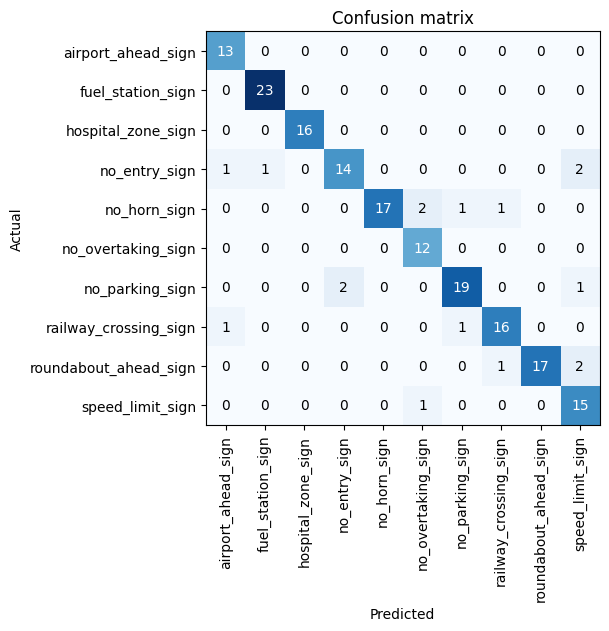

In [ ]:
interp_r50 = ClassificationInterpretation.from_learner(learn_r50)
interp_r50.plot_confusion_matrix(figsize=(6, 8))

# EfficientNet-B0

In [ ]:
learn_eff = vision_learner(dls, efficientnet_b0, metrics=accuracy)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 111MB/s] 


In [ ]:
learn_eff.fine_tune(5)


epoch,train_loss,valid_loss,accuracy,time
0,2.018421,1.180941,0.659218,00:40


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,1.223332,0.859993,0.765363,00:39
1,1.048740,0.885126,0.765363,00:40
2,0.893582,0.896668,0.782123,00:38
3,0.720661,0.758942,0.810056,00:42
4,0.638174,0.725940,0.832402,00:49


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in by

In [ ]:
results.append(["EfficientNet-B0", round(learn_eff.validate()[1], 2)])

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
learn_eff.export("models/road_sign_classifier_efficientnet_b0_best.pkl")

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


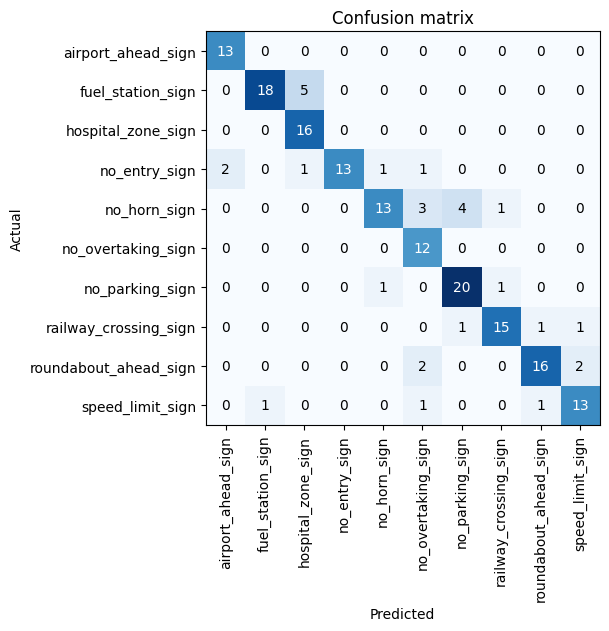

In [ ]:
interp_eff = ClassificationInterpretation.from_learner(learn_eff)
interp_eff.plot_confusion_matrix(figsize=(6, 8))

# **Model Comparison**

In [ ]:
from tabulate import tabulate
print(tabulate(results, headers=["Model", "Accuracy"], tablefmt="fancy_grid"))

╒═════════════════╤════════════╕
│ Model           │   Accuracy │
╞═════════════════╪════════════╡
│ ResNet-34       │       0.91 │
├─────────────────┼────────────┤
│ ResNet-54       │       0.91 │
├─────────────────┼────────────┤
│ EfficientNet-B0 │       0.83 │
╘═════════════════╧════════════╛
